In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("Datasets\Algerian_forest_fires_dataset_CLEANED.csv")
df = df.drop("Unnamed: 0",axis =1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [30]:
df = df.drop("year",axis = 1)

In [31]:
x = df.drop("FWI",axis = 1)
Y = df["FWI"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,Y,train_size=.8,random_state=42)

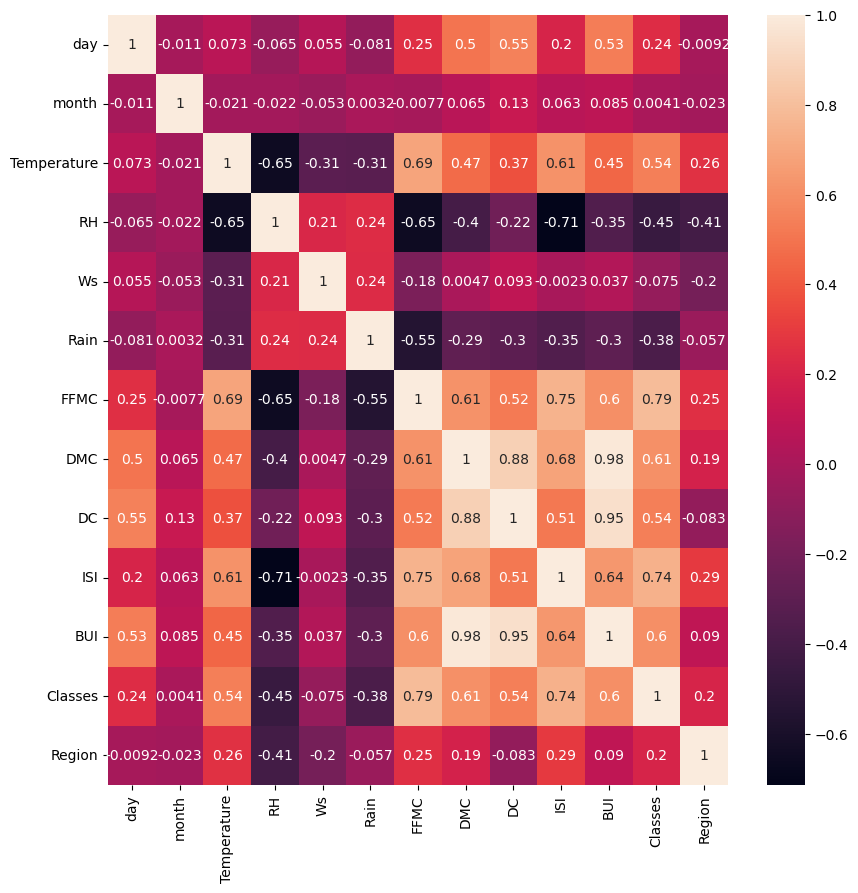

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [34]:
X_train.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,-0.011064,0.073450,-0.065199,0.055415,-0.081151,0.253737,0.499854,0.545880,0.200509,0.532115,0.240048,-0.009194
month,-0.011064,1.000000,-0.021475,-0.021522,-0.052803,0.003170,-0.007739,0.064715,0.129498,0.062550,0.084989,0.004097,-0.023492
Temperature,0.073450,-0.021475,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.065199,-0.021522,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,0.055415,-0.052803,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.081151,0.003170,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.253737,-0.007739,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.499854,0.064715,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.545880,0.129498,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.200509,0.062550,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889


In [35]:
import pandas as pd


def remove_correlated_columns(df, threshold=.92):
  """
  Removes one of the highly correlated columns (above a threshold) from a pandas DataFrame.

  Args:
      df (pandas.DataFrame): The input DataFrame.
      threshold (float): The correlation threshold for considering columns highly correlated.

  Returns:
      pandas.DataFrame: The DataFrame with one of the highly correlated columns removed.
  """

  # Calculate correlation matrix
  correlation = df.corr()

  # Create a copy to avoid modifying the original DataFrame
  df_modified = df.copy()
  drop_col_list = []
  # Iterate through the upper triangle of the correlation matrix (excluding self-correlation)
  for col1 in correlation.columns:
    for col2 in correlation.columns:
      if col1 != col2 and abs(correlation.loc[col1, col2]) > threshold:
        # Check if both columns exist before dropping
        if col1 in df_modified.columns and col2 in df_modified.columns:
          # Choose a column to remove based on the logic you prefer
          if (abs(correlation.loc[col1]).sum()) < (abs(correlation.loc[col2]).sum()):
            drop_col_list.append(col1)
          else:
            drop_col_list.append(col2)
        break  # Exit inner loop after finding one correlated pair

  return drop_col_list

In [36]:
X_train.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'Classes', 'Region'],
      dtype='object')

In [37]:
a = remove_correlated_columns(X_train)
a = ['month','day','DC','ISI']

In [38]:
X_train.drop(a,axis = 1,inplace=True)
X_test.drop(a,axis = 1,inplace = True)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_test,y_pred)



In [41]:
score

0.7993503393904204

In [42]:
mae

1.7388926094817398

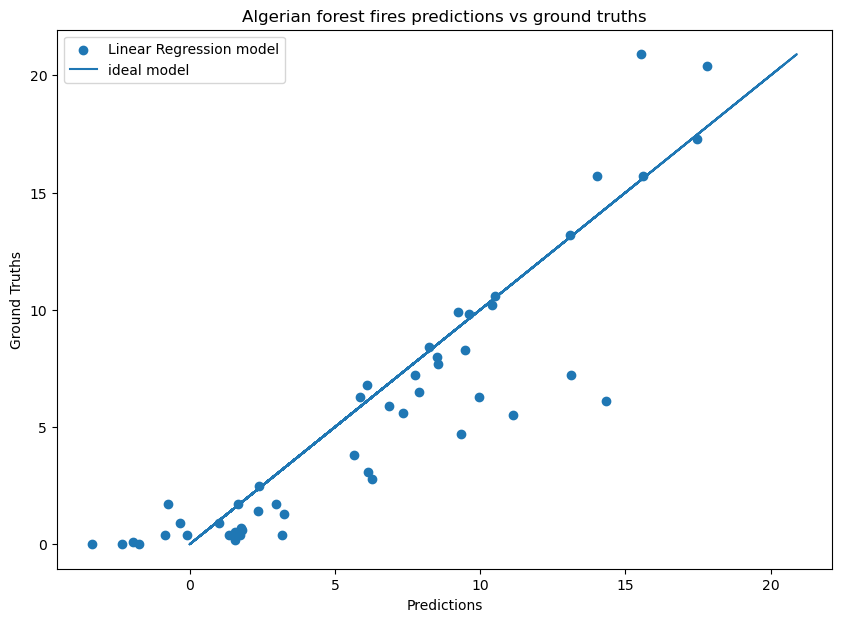

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10//1,3.5*2))
plt.scatter(y_pred,y_test,label ="Linear Regression model")
plt.plot(y_test,y_test,label = "ideal model")
plt.title("Algerian forest fires predictions vs ground truths")
plt.ylabel("Ground Truths")
plt.xlabel("Predictions")
plt.legend()

In [44]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error
lasso_reg = LassoCV(cv=5,verbose = True)
lasso_reg.fit(X_train_scaled,y_train)
y_pred = lasso_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_test,y_pred)

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [45]:
score

0.8016214551455818

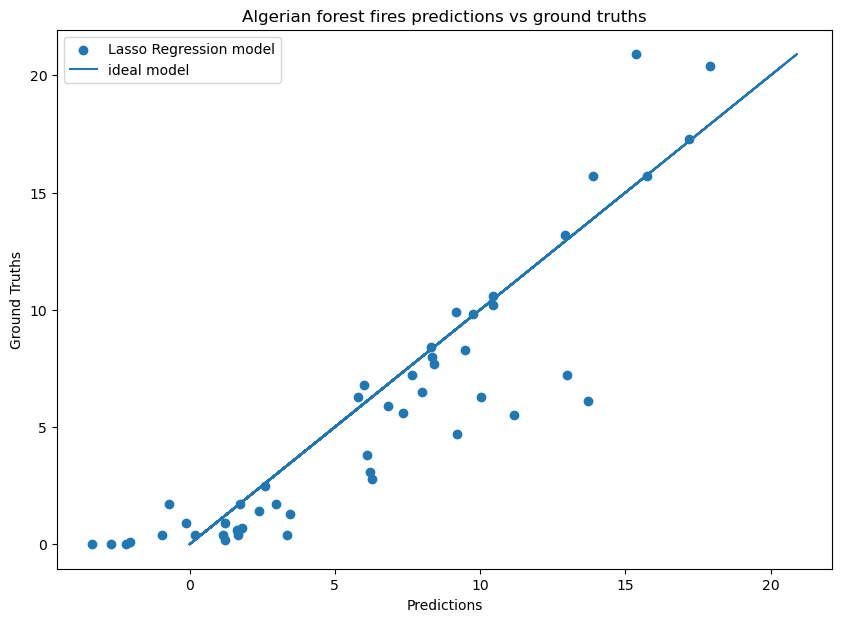

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10//1,3.5*2))
plt.scatter(y_pred,y_test,label ="Lasso Regression model")
plt.plot(y_test,y_test,label = "ideal model")
plt.title("Algerian forest fires predictions vs ground truths")
plt.ylabel("Ground Truths")
plt.xlabel("Predictions")
plt.legend()

In [47]:
import pickle
with open('Models/linear_regression.pkl', 'wb') as f:
    pickle.dump(linreg,f)
with open('Models/LassoCV_regression.pkl','wb') as f:
    pickle.dump(lasso_reg,f)
with open('Models/standard_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [49]:
X_test.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'BUI', 'Classes',
       'Region'],
      dtype='object')